<a href="https://colab.research.google.com/github/Benedictus3/mvp-analise-dados/blob/main/MVP_Analise%20de%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 🎮 Análise de Dados – League of Legends (Patch 25.11)

# 1. Introdução
# Este notebook tem como objetivo explorar atributos dos campeões do League of Legends no patch 25.11 (2025).
# A proposta é analisar os dados para identificar campeões com vantagens, padrões de distribuição de atributos e possíveis desbalanceamentos.

# 2. Importação das bibliotecas e carregamento dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as ms # para tratamento de missings
# Transformações Numéricas
from sklearn.preprocessing import StandardScaler #padronização
from sklearn.preprocessing import MinMaxScaler # normalização
# Transformações Categóricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn.preprocessing import LabelEncoder # Label Encoder
#Testes e classificações
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# Versão da matplotlib utilizada
mpl.__version__

'3.10.0'

In [6]:
# para ignorar warning
import warnings
warnings.filterwarnings("ignore")

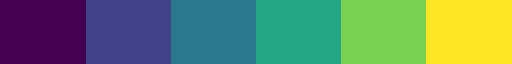

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [7]:
# Definição de cores
 #Paleta Viridis também recomendada para pessoas com daltonismo

vcmap = plt.get_cmap("viridis", 6)

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Melhorando a estética modificando mais alguns parâmetros gráficos
# eixo e grade dos gráficos
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0") #
plt.rc("axes", edgecolor="#cccccc", lw=0.1) # 0.1 espessura da borda dos eixos

In [8]:
# Carregando o dataset e trazendo o cabeçalho
df = pd.read_csv('https://raw.githubusercontent.com/Benedictus3/mvp-analise-dados/main/data.csv', index_col=0).reset_index().rename(columns={'index':'Champion'})
df.head()

,Champion,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,2400,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,1575,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,1575,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,2400,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,675,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN


In [9]:
# Mostrando as últimas linhas do dataset
df.tail()

,Champion,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
167,Zeri,221.0,Zeri,The Spark of Zaun,2,Marksman,NaN,Mana,"{'hp_base': 600, 'hp_lvl': 110, 'mp_base': 250...",Ranged,...,2400,880,{1: 'Living Battery'},{1: 'Burst Fire'},{1: 'Ultrashock Laser'},{1: 'Spark Surge'},{1: 'Lightning Crash'},"{1: 'Living Battery', 2: 'Burst Fire', 3: 'Ult...",NaN,NaN
168,Ziggs,115.0,Ziggs,the Hexplosives Expert,2,Mage,NaN,Mana,"{'hp_base': 606, 'hp_lvl': 106, 'mp_base': 480...",Ranged,...,2400,880,{1: 'Short Fuse'},{1: 'Bouncing Bomb'},{1: 'Satchel Charge'},{1: 'Hexplosive Minefield'},{1: 'Mega Inferno Bomb'},"{1: 'Short Fuse', 2: 'Bouncing Bomb', 3: 'Satc...",Zigmund,NaN
169,Zilean,26.0,Zilean,the Chronokeeper,2,Support,Mage,Mana,"{'hp_base': 574, 'hp_lvl': 96, 'mp_base': 452,...",Ranged,...,675,585,{1: 'Time in a Bottle'},{1: 'Time Bomb'},{1: 'Rewind'},{1: 'Time Warp'},{1: 'Chronoshift'},"{1: 'Time in a Bottle', 2: 'Time Bomb', 3: 'Re...",NaN,NaN
170,Zoe,142.0,Zoe,the Aspect of Twilight,3,Mage,Support,Mana,"{'hp_base': 630, 'hp_lvl': 106, 'mp_base': 425...",Ranged,...,2400,880,{1: 'More Sparkles!'},"{1: 'Paddle Star', 2: 'Paddle Star 2'}",{1: 'Spell Thief'},{1: 'Sleepy Trouble Bubble'},{1: 'Portal Jump'},"{1: 'More Sparkles!', 2: 'Paddle Star', 3: 'Sp...",NaN,NaN
171,Zyra,143.0,Zyra,Rise of the Thorns,2,Mage,Support,Mana,"{'hp_base': 574, 'hp_lvl': 93, 'mp_base': 418,...",Ranged,...,1575,790,{1: 'Garden of Thorns'},{1: 'Deadly Spines'},{1: 'Rampant Growth'},{1: 'Grasping Roots'},{1: 'Stranglethorns'},"{1: 'Garden of Thorns', 2: 'Deadly Spines', 3:...",NaN,NaN


In [10]:
# 3. Visão Geral
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion            172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-nu

In [11]:
# Contagem de linhas
df.count()

,0
Champion,172
id,172
apiname,172
title,172
difficulty,172
herotype,172
alttype,144
resource,167
stats,172
rangetype,172


In [12]:
# Correção da nomeclatura da coluna
df = df.rename(columns={'apiname': 'name'})
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion            172 non-null    object 
 1   id                  172 non-null    float64
 2   name                172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-nu

In [13]:
# Visão Geral
print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nValores ausentes:")
print(df.isnull().sum())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion            172 non-null    object 
 1   id                  172 non-null    float64
 2   name                172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-nu

In [14]:
# Ajuste em coluna
df['alttype'] = df['alttype'].fillna(df['herotype'])
print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nValores ausentes:")
print(df.isnull().sum())



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion            172 non-null    object 
 1   id                  172 non-null    float64
 2   name                172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             172 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-nu


Estatísticas descritivas:


,Champion,id,name,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
count,172,172.000000,172,172,172.000000,172,172,167,172,172,...,172.000000,172.000000,172,172,172,172,172,170,57,14
unique,172,NaN,171,170,NaN,6,6,14,172,2,...,NaN,NaN,171,172,171,172,171,170,56,14
top,Aatrox,NaN,Kled,the Missing Link,NaN,Fighter,Mage,Mana,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,NaN,NaN,{1: 'Rage Gene'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Violent Tendencies'},{1: 'Umbral Dash'},{1: 'GNAR!'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",Kled and Skaarl,GP
freq,1,NaN,2,2,NaN,49,47,142,1,91,...,NaN,NaN,2,1,2,1,2,1,2,1
mean,NaN,195.728488,NaN,NaN,1.872093,NaN,NaN,NaN,NaN,NaN,...,1568.906977,707.296512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,243.326685,NaN,NaN,0.671848,NaN,NaN,NaN,NaN,NaN,...,842.690430,218.351986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,225.000000,260.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,43.750000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,675.000000,585.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,102.500000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,1575.000000,790.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,233.250000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,2400.000000,880.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valores faltantes por coluna:


,0
resource,5
skills,2
fullname,115
nickname,158


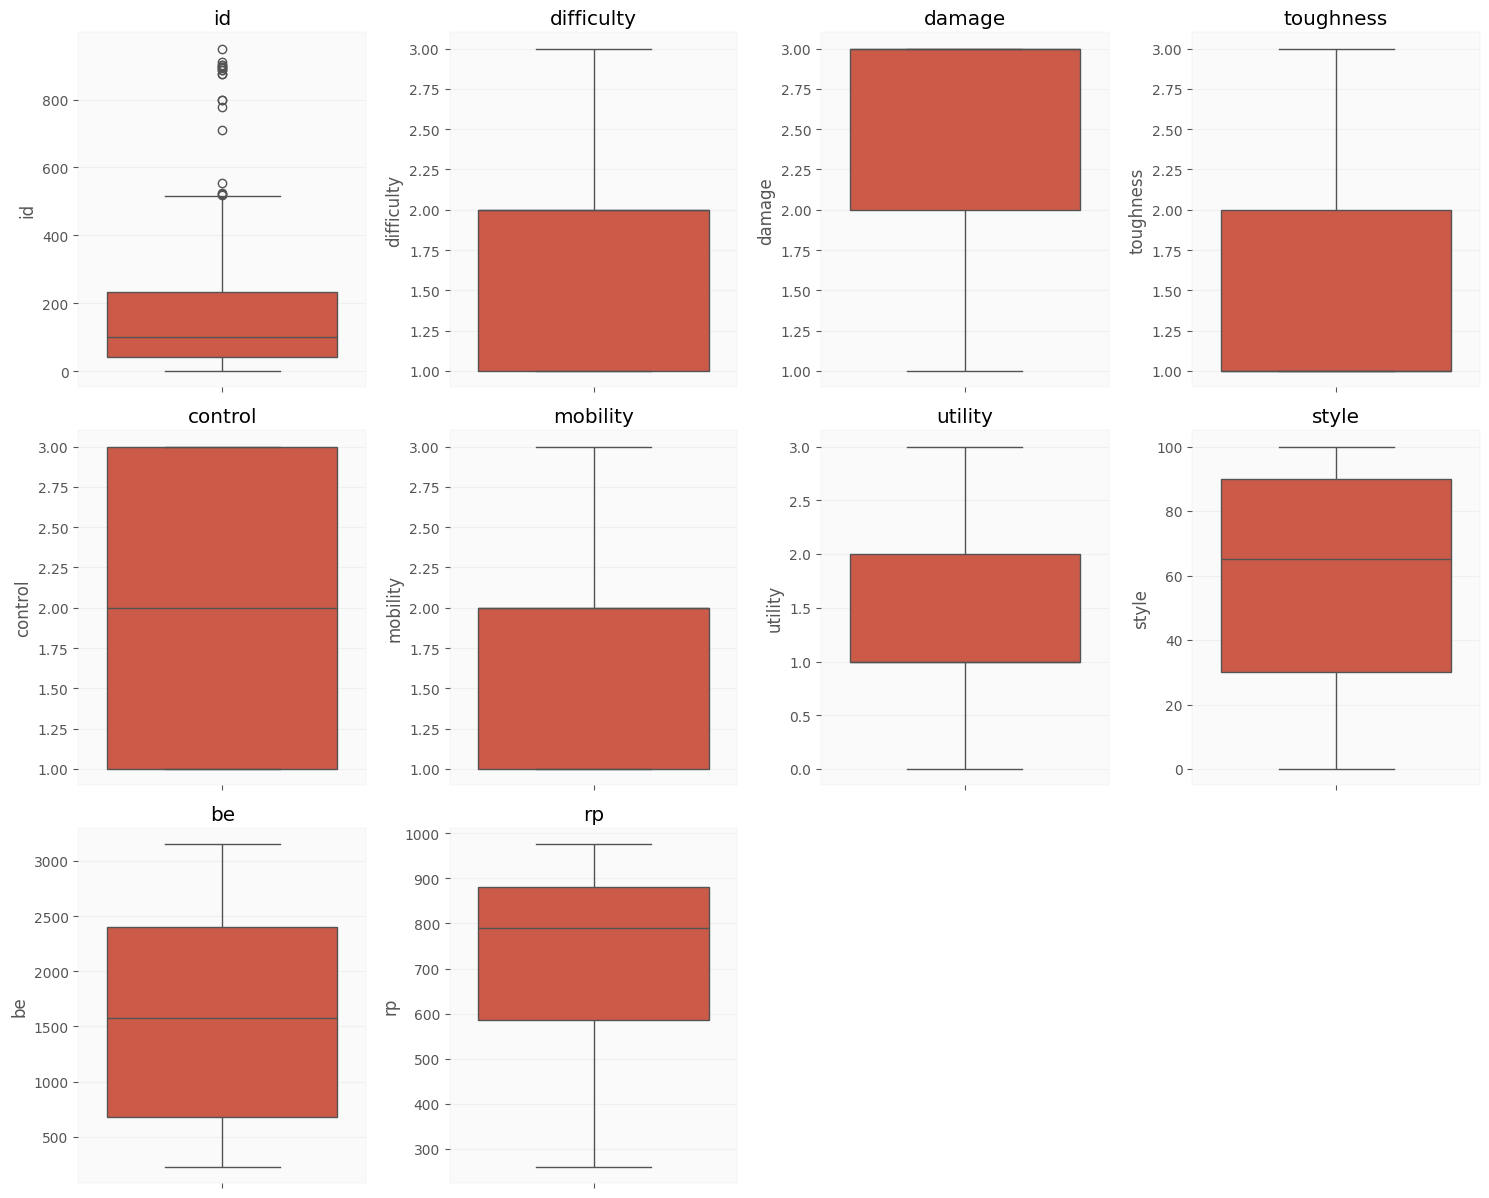

In [15]:
# Resumo estatístico
print("\nEstatísticas descritivas:")
display(df.describe(include='all'))

# Valores faltantes
print("\nValores faltantes por coluna:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Análise de outliers
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

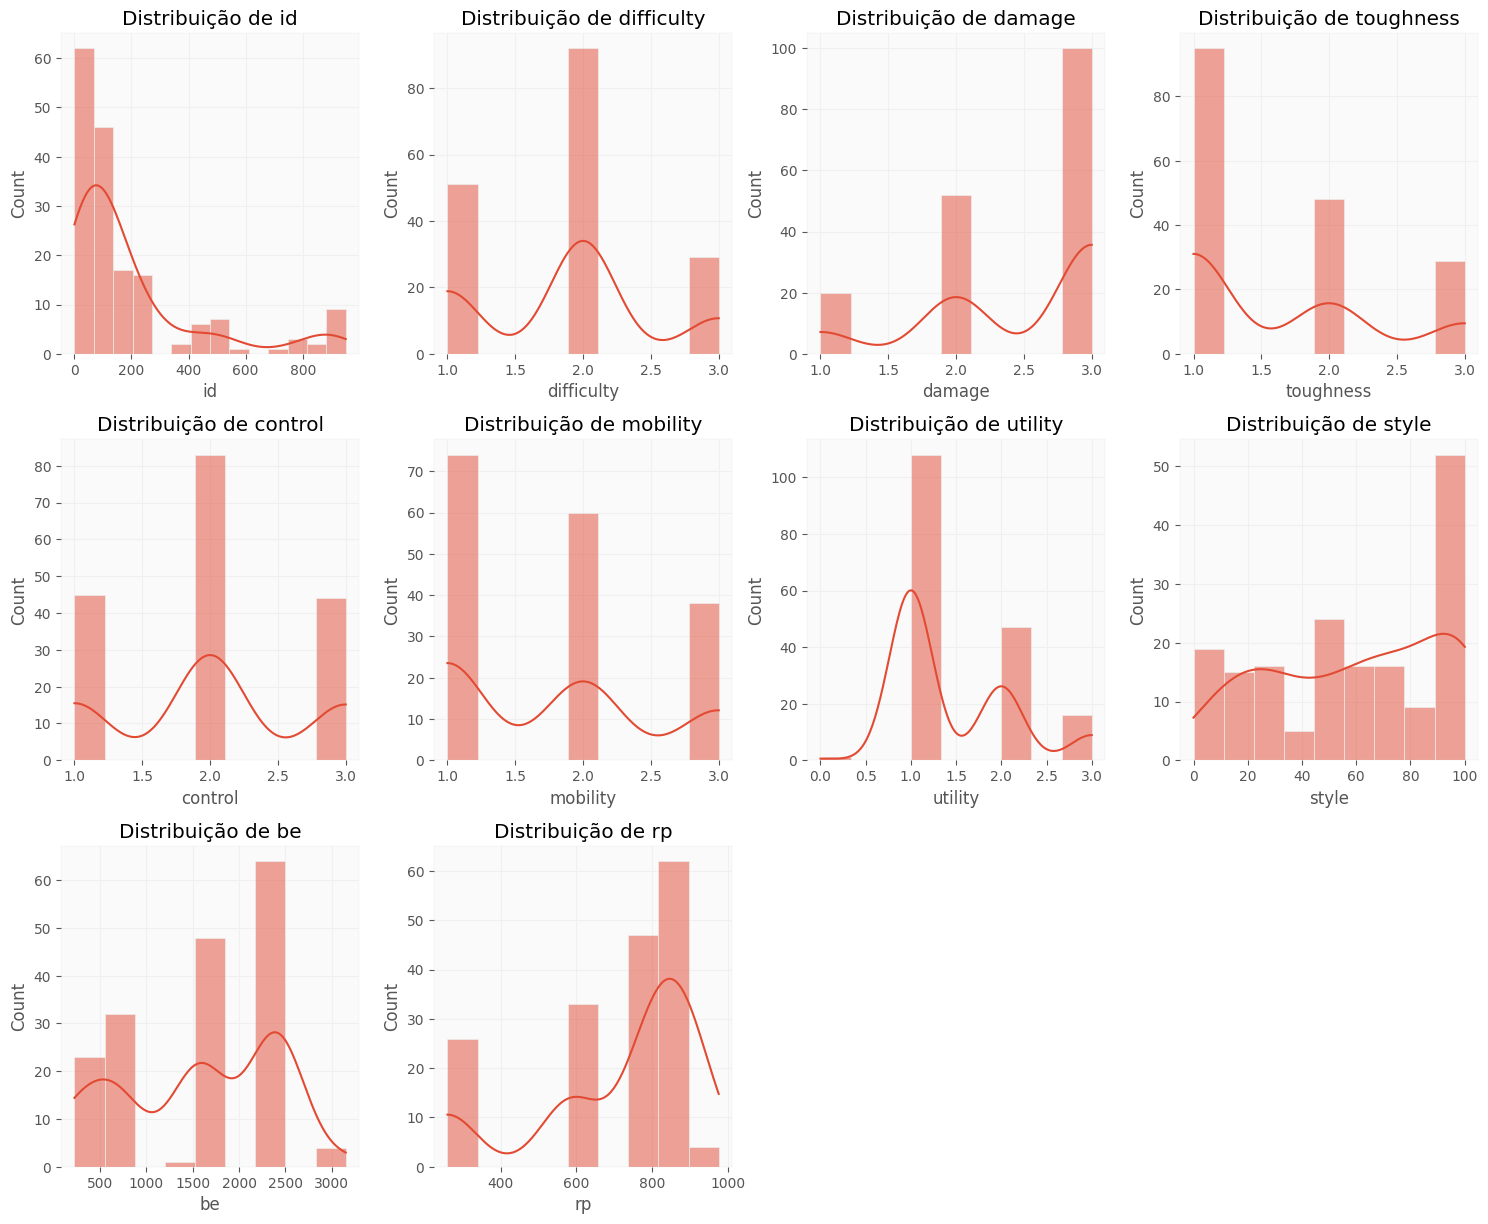

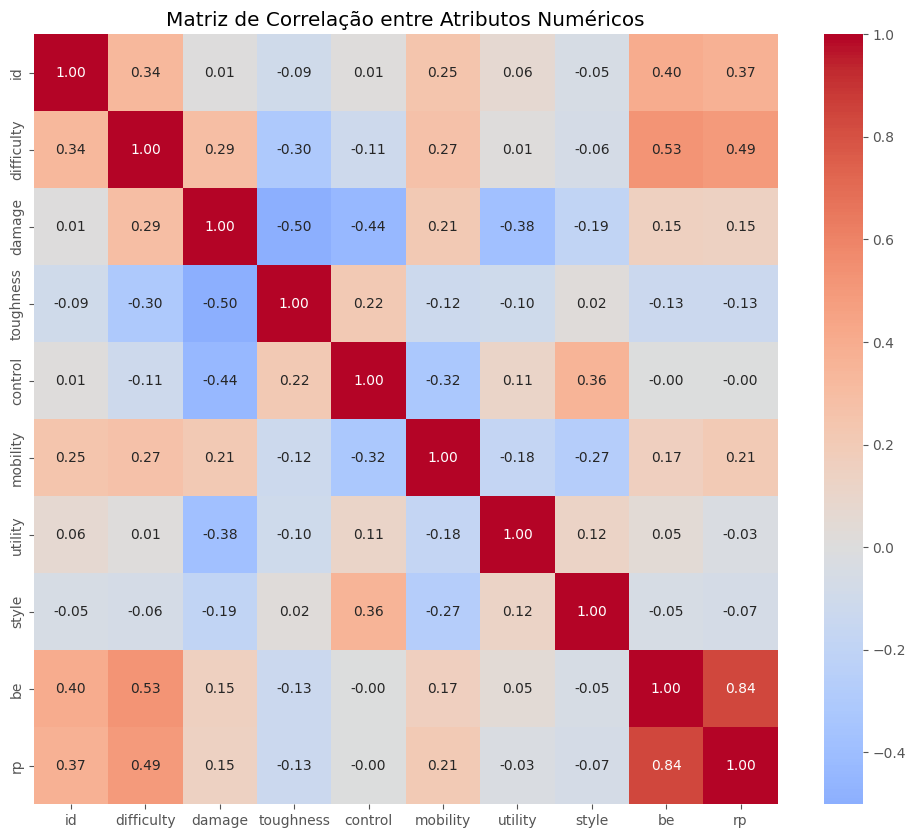

In [16]:
# Distribuição dos atributos numéricos
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Matriz de correlação
plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Atributos Numéricos')
plt.show()

# Análise de classes (se aplicável)
if 'tier' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='tier', data=df)
    plt.title('Distribuição de Tiers')
    plt.show()

In [21]:
# Tratamento de valores faltantes
# Primeiro, vamos identificar as colunas numéricas
from sklearn.impute import SimpleImputer # Import SimpleImputer

numeric_cols = df.select_dtypes(include=np.number).columns

# Agora sim podemos usar o SimpleImputer
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Para colunas categóricas
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Codificação de variáveis categóricas
# Preservando o nome do campeão como identificador
# Exclude 'Champion' from the columns to be one-hot encoded
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col != 'Champion'])

# Normalização/Standardização
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Verificação do resultado
print("Dataset após pré-processamento:")
display(df.head())

Dataset após pré-processamento:


,id,difficulty,damage,toughness,control,mobility,utility,style,be,rp,...,nickname_J4,nickname_Kagetora,nickname_LB,nickname_MF,nickname_Rainbow Scyther,nickname_Renata,"nickname_Rhaast, Darkin, Shadow Assassin",nickname_TF,nickname_Unknown,"nickname_Zaun Amorphous Combatant, Z.A.C."
0,0.289638,0.190937,0.770962,1.826882,0.008083,0.268567,0.818786,-1.240150,0.989117,0.793250,...,False,False,False,False,False,False,False,False,True,False
1,-0.382199,0.190937,0.770962,-0.813653,0.008083,1.551720,-0.679418,1.259772,0.007252,0.379868,...,False,False,False,False,False,False,False,False,True,False
2,-0.460511,0.190937,0.770962,-0.813653,-1.382137,1.551720,-0.679418,0.166056,0.007252,0.379868,...,False,False,False,False,False,False,False,False,True,False
3,-0.122532,1.683713,0.770962,-0.813653,-1.382137,1.551720,0.818786,-1.833881,0.989117,0.793250,...,False,False,False,False,False,False,False,False,True,False
4,-0.757274,-1.301840,-2.111765,1.826882,1.398302,-1.014586,0.818786,0.166056,-1.063875,-0.561724,...,False,False,False,False,False,False,False,False,True,False
